In [ ]:
# Prepared using:
# - https://miroslawmamczur.pl/jak-dzialaja-konwolucyjne-sieci-neuronowe-cnn/
# - https://www.tensorflow.org/tutorials/images/cnn?hl=en

### Load and show image

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load image and check shape
input_image = plt.imread('./pwr.jpg')
print(f'Input shape: {input_image.shape}')

Input shape: (222, 362, 3)


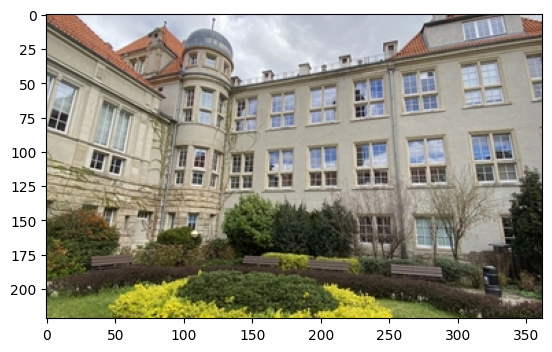

In [ ]:
# show image wmat.jpg
plt.imshow(input_image)

In [ ]:
# function changing colors to "gray-scale"
def rgb2gray(rgb):
    #r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #return 0.299 * r + 0.587 * g + 0.114 * b
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [ ]:
# change image [input_image] to "gray-scale"
input_image = rgb2gray(input_image)

# and check shape of the image
print(f'Input shape: {input_image.shape}')

Input shape: (222, 362)


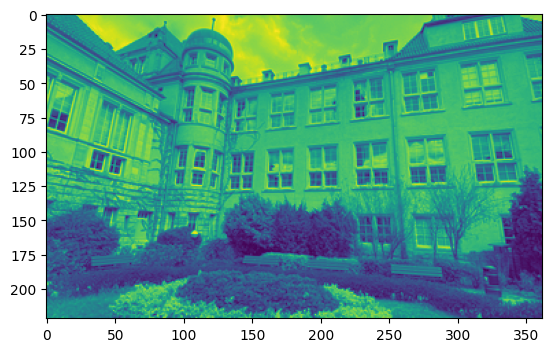

In [ ]:
# show the image wmat.jpg in "gray-scale"
plt.imshow(input_image)

### Convolution using convolve2d()

In [ ]:
# load  module
from scipy.signal import convolve2d

# function calculating the convolution of the kernel [kernel] with image [img]
def apply_kernel_to_image(img, kernel, title=''):

    feature = convolve2d(img, kernel, boundary='symm', mode='same')

    # Plot
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(img, 'gray')
    ax1.set_title('Input image', fontsize=15)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(feature, 'gray')
    ax2.set_title(f'Image after convolution with given kernel ({title})', fontsize=15)
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.show()

### Examples of kernels used in the convolutions

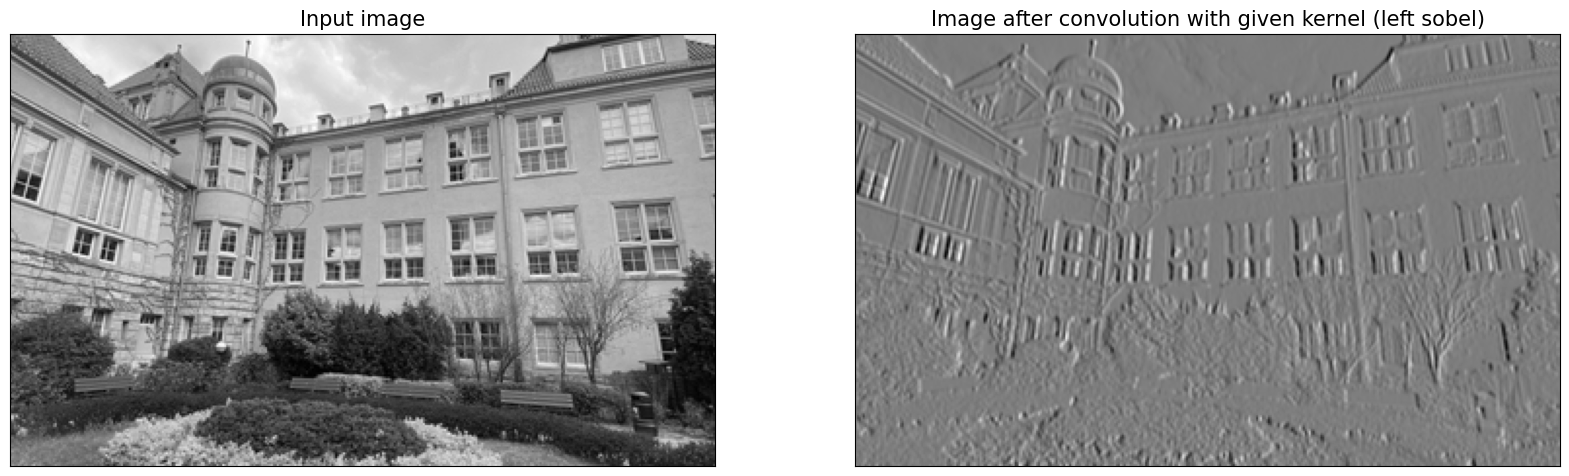

In [ ]:
# Example ot the kernel - left sobel
sobel_left = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

apply_kernel_to_image(input_image, sobel_left, 'left sobel')

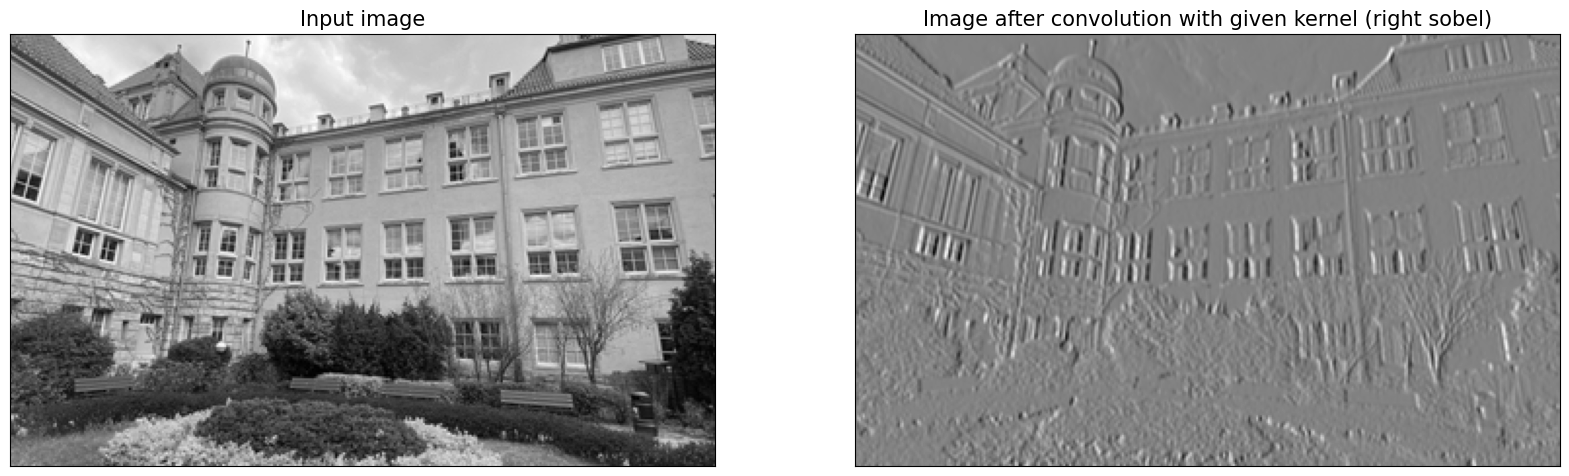

In [ ]:
# Example ot the kernel - right sobel
sobel_right = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])

apply_kernel_to_image(input_image, sobel_right, 'right sobel')

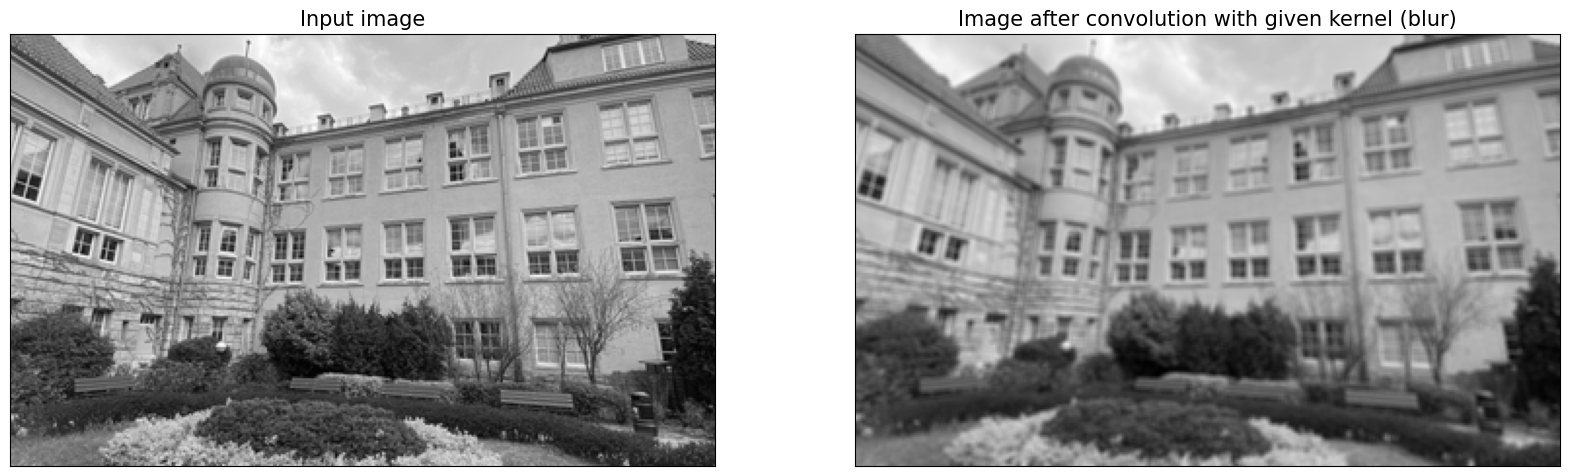

In [ ]:
# Example ot the kernel - blur
blur = np.array([
    [0.01, 0.01, 0.01],
    [0.01, 0.01, 0.01],
    [0.01, 0.01, 0.01]])

apply_kernel_to_image(input_image, blur, 'blur')

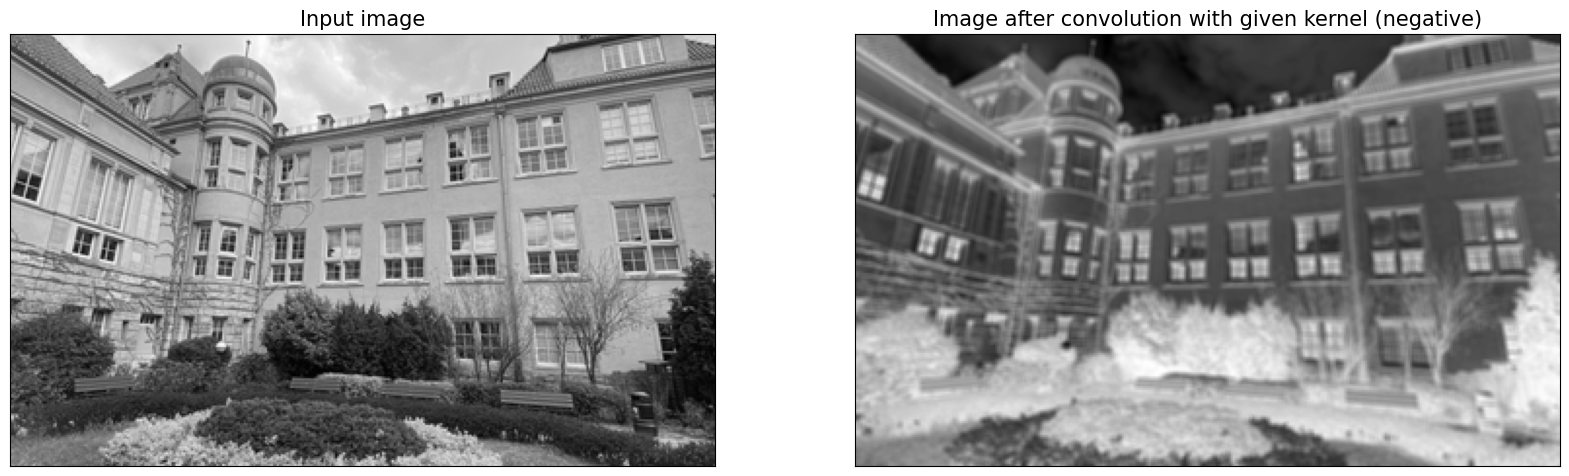

In [ ]:
# Example ot the kernel - negative
negatyw = np.array([
    [-1, -1, -1],
    [-1, -1, -1],
    [-1, -1, -1]])

apply_kernel_to_image(input_image, negatyw, 'negative (with blur?)')

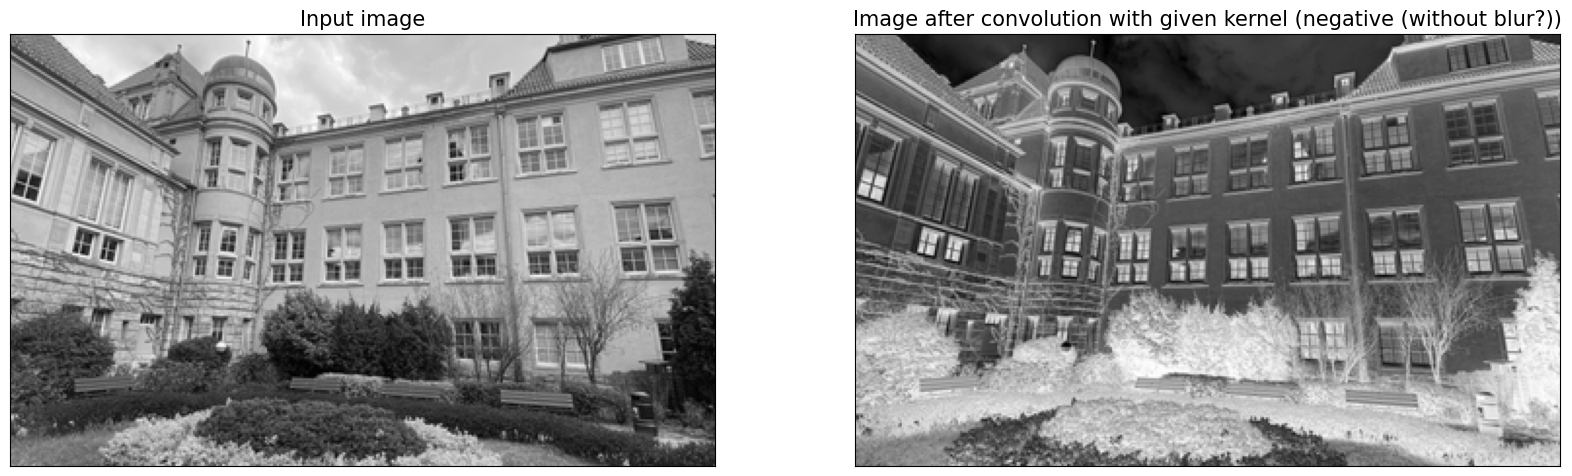

In [ ]:
# Example ot the kernel - negative
negatyw1 = np.array([
    [0, 0, 0],
    [0, -1, 0],
    [0, 0, 0]])

apply_kernel_to_image(input_image, negatyw1, 'negative (without blur?)')

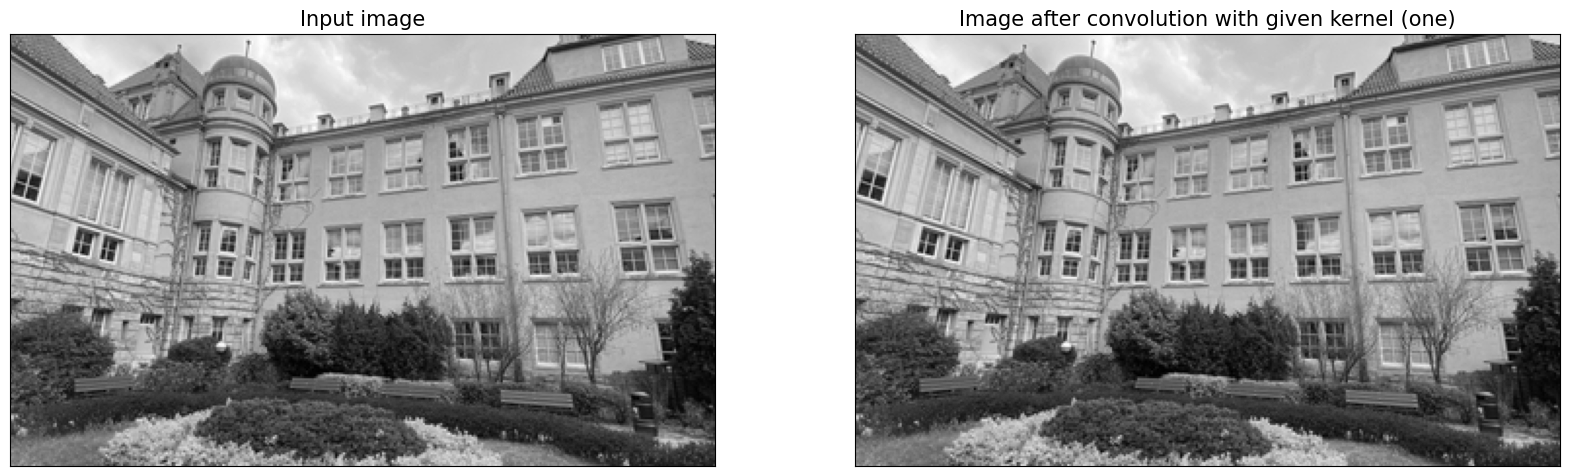

In [ ]:
# Example ot the kernel - one
one1 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]])

apply_kernel_to_image(input_image, one1, 'one')

In [ ]:
# another examples of kernels - see e.g. https://en.wikipedia.org/wiki/Kernel_(image_processing)

### Datest CIFAR-10

In [ ]:
# iimport modules
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
# download and train-test split of the dataset CIFAR10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


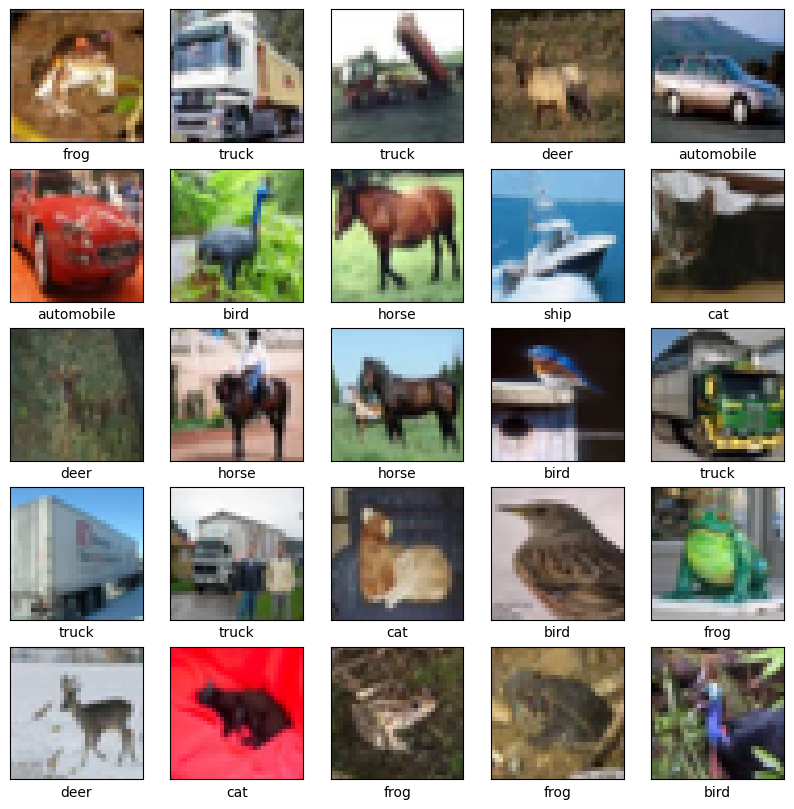

In [ ]:
# 25 examples of the images from dataset CIFAR-10
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Artificial Neural network (ANN) for CIFAR-10 classification task

In [ ]:
# import modules
import tensorflow as tf
import keras
from keras import layers

In [ ]:
# import modules from keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Bulding Neural Network model [ann] with 3 dense layers
ann = Sequential()
ann.add(Flatten(input_shape=(32, 32, 3)))
ann.add(Dense(128, activation="relu"))
ann.add(Dense(64, activation="relu"))
ann.add(Dense(10))

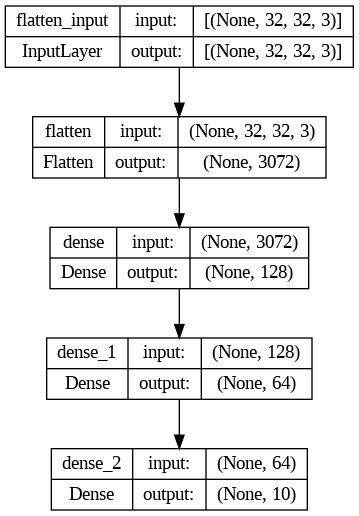

In [ ]:
# import module to plot graph of the model [ann]
from keras.utils import plot_model

# model graph [ann]
keras.utils.plot_model(ann,
                       "my_first_model_with_shape_info.png",
                       show_shapes=True)

In [ ]:
# summary of the architecture for model [ann]
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# number_of_parameters = (dim_previous_layer + 1) * dim_current_layer
# e.g. 393 344 = (3072 + 1) * 128
# e.g. 8 256  = (128 + 1) * 64
# e.g. 650 = (64 + 1) * 10

In [ ]:
# model compilation [ann]
ann.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# model training [ann]
history_ann = ann.fit(train_images, train_labels,
                      epochs=50, batch_size=32,
                      validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 12s 8ms/step - loss: 1.9025 - accuracy: 0.3132 - val_loss: 1.7588 - val_accuracy: 0.3748
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7172 - accuracy: 0.3835 - val_loss: 1.7227 - val_accuracy: 0.3812
Epoch 3/50
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6495 - accuracy: 0.4078 - val_loss: 1.6528 - val_accuracy: 0.4098
Epoch 4/50
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5951 - accuracy: 0.4295 - val_loss: 1.5790 - val_accuracy: 0.4424
Epoch 5/50
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5623 - accuracy: 0.4391 - val_loss: 1.5963 - val_accuracy: 0.4330
Epoch 6/50
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5378 - accuracy: 0.4488 - val_loss: 1.5481 - val_accuracy: 0.4442
Epoch 7/50
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5136 - accuracy: 0.4581 - val_loss: 1.5663 - val_a

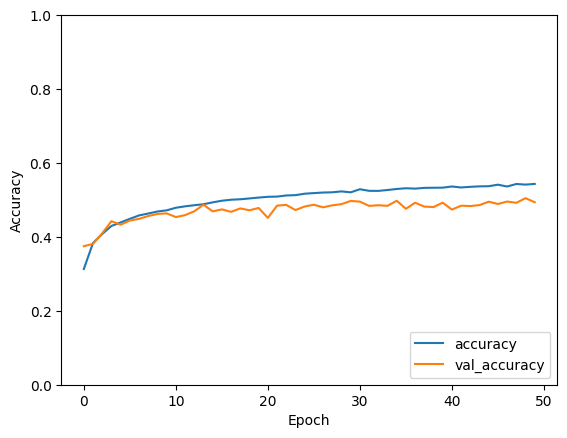

In [ ]:
# Plot of learning curves for model [ann]
plt.plot(history_ann.history['accuracy'], label='accuracy')
plt.plot(history_ann.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
# loss function and accuracy on the test set for model [ann]
test_loss_ann, test_acc_ann = ann.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.4808 - accuracy: 0.4833 - 1s/epoch - 4ms/step


In [ ]:
# accuracy on the test set for model [ann]
print(test_acc_ann)

0.48330000042915344


In [ ]:
# saving model [ann]
ann.save("path_to_my_model.keras")

# deleting model [ann]
#del ann

# loading model [ann] from file
model = keras.models.load_model("path_to_my_model.keras")

### Convolutional Neural Network (CNN) for CIFAR-10 classification task

In [ ]:
# import modules from keras
from tensorflow.keras import layers, models

In [ ]:
# Building CNN with 1 convolutional layer and 1 pooling layer
cnn = models.Sequential()
cnn.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
#cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
#cnn.add(layers.MaxPooling2D((2, 2)))
#cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
#cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10))

In [ ]:
# summary of architecture of the created model [cnn]
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 24)        672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 24)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5400)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54010     
                                                                 
Total params: 54682 (213.60 KB)
Trainable params: 54682 (213.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# number_of_parameters = (kernel_dim_1 * kernel_dim_2 * number_of_channels + 1) * number_of_kernels
# number_of_channels = 3 or 1 (RGB or Gray-scale)
# kernel_dim_1 = 3 and kernel_dim_2 = 3 because we use kernels of size (3,3)
# e.g. 672 = (3 * 3 * 3 + 1) * 24

In [ ]:
# model compilation [cnn]
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# model training [cnn]
history_cnn = cnn.fit(train_images, train_labels,
                     epochs=10, batch_size=32,
                     validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 31s 21ms/step - loss: 1.5223 - accuracy: 0.4672 - val_loss: 1.3664 - val_accuracy: 0.5194
Epoch 2/10
1407/1407 [==============================] - 30s 22ms/step - loss: 1.2571 - accuracy: 0.5628 - val_loss: 1.2495 - val_accuracy: 0.5620
Epoch 3/10
1407/1407 [==============================] - 29s 20ms/step - loss: 1.1530 - accuracy: 0.6000 - val_loss: 1.1757 - val_accuracy: 0.5952
Epoch 4/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.0827 - accuracy: 0.6246 - val_loss: 1.1142 - val_accuracy: 0.6188
Epoch 5/10
1407/1407 [==============================] - 27s 19ms/step - loss: 1.0261 - accuracy: 0.6468 - val_loss: 1.0837 - val_accuracy: 0.6292
Epoch 6/10
1407/1407 [==============================] - 28s 20ms/step - loss: 0.9834 - accuracy: 0.6613 - val_loss: 1.0602 - val_accuracy: 0.6370
Epoch 7/10
1407/1407 [==============================] - 28s 20ms/step - loss: 0.9486 - accuracy: 0.6729 - val_loss: 1.0793 -

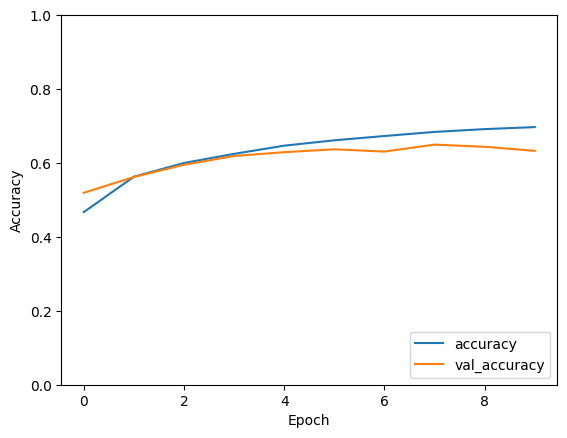

In [ ]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
# loss function and accuracy on test set for model [cnn]
test_loss_cnn, test_acc_cnn = cnn.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 1.1071 - accuracy: 0.6179 - 2s/epoch - 6ms/step


In [ ]:
# accuracy on test set for model [cnn]
print(test_acc_cnn)

0.617900013923645


In [ ]:
# How this result can be improved?
#
# We can make some experiments involving:
#
# - change number of the epochs,
#
# - change number of the convolutional layers,
#
# - change number and size of the kernels,
#
# - change batch_size
#
# - droput layer(s)
#   (https://keras.io/api/layers/regularization_layers/dropout/),
#
# - batch normalization
#   (https://keras.io/api/layers/normalization_layers/batch_normalization/),
#
# - transfer learning
#   (https://keras.io/guides/transfer_learning/),
#
# - data augmentation
#   (https://www.tensorflow.org/tutorials/images/data_augmentation?hl=en)